## Stemming and Lemmatization

Stemming and lemmatization are two popular techniques to reduce a given word to its base word. Stemming uses a fixed set of rules to remove suffixes, and prefixes whereas lemmatization use language knowledge to come up with a correct base word. Stemming will be demonstrated in ntlk (spacy doesn't support stemming) whereas code for lemmatization is written in spacy

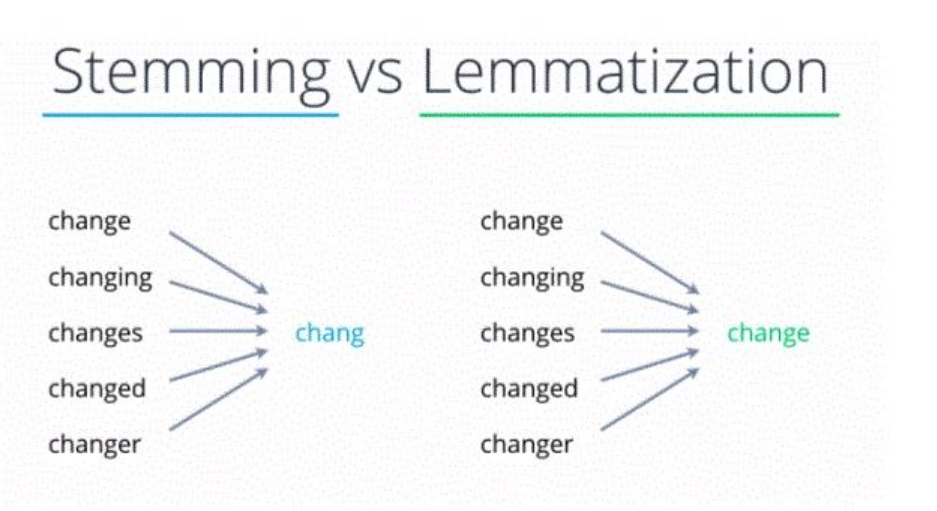

### Stemming in NLTK


In [1]:
pip install nltk --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

In [4]:
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]

for word in words:
    print(word, "|", stemmer.stem(word),)

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


### Lemmatization in Spacy

In [8]:
import spacy

In [10]:
!python -m spacy download en_core_web_lg  --quiet


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [11]:
nlp = spacy.load("en_core_web_lg")

In [12]:
doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
for token in doc:
    print(token, " | ", token.lemma_)

eating  |  eat
eats  |  eat
eat  |  eat
ate  |  eat
adjustable  |  adjustable
rafting  |  rafting
ability  |  ability
meeting  |  meet
better  |  well


### Customizing lemmatizer

In [13]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [14]:
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{"TEXT": 'Bro'}], [{"TEXT": 'Brah'}]], {'LEMMA': 'Brother'})

In [15]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for tok in doc:
    print(tok.text, "|", tok.lemma_)

Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


In [16]:
doc[6]

Brah

In [17]:
doc[6].lemma_

'Brother'